In [41]:
!pip install -U scikit-learn==1.7.0 --quiet



In [42]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.6.1


In [43]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [45]:
import pandas as pd

car_df = pd.read_csv("data.csv")
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [46]:
car_df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [47]:
car_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [48]:
car_df.describe()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [49]:
car_df['Make'].value_counts()

,count
Make,
Chevrolet,1123
Ford,881
Volkswagen,809
Toyota,746
Dodge,626
Nissan,558
GMC,515
Honda,449
Mazda,423


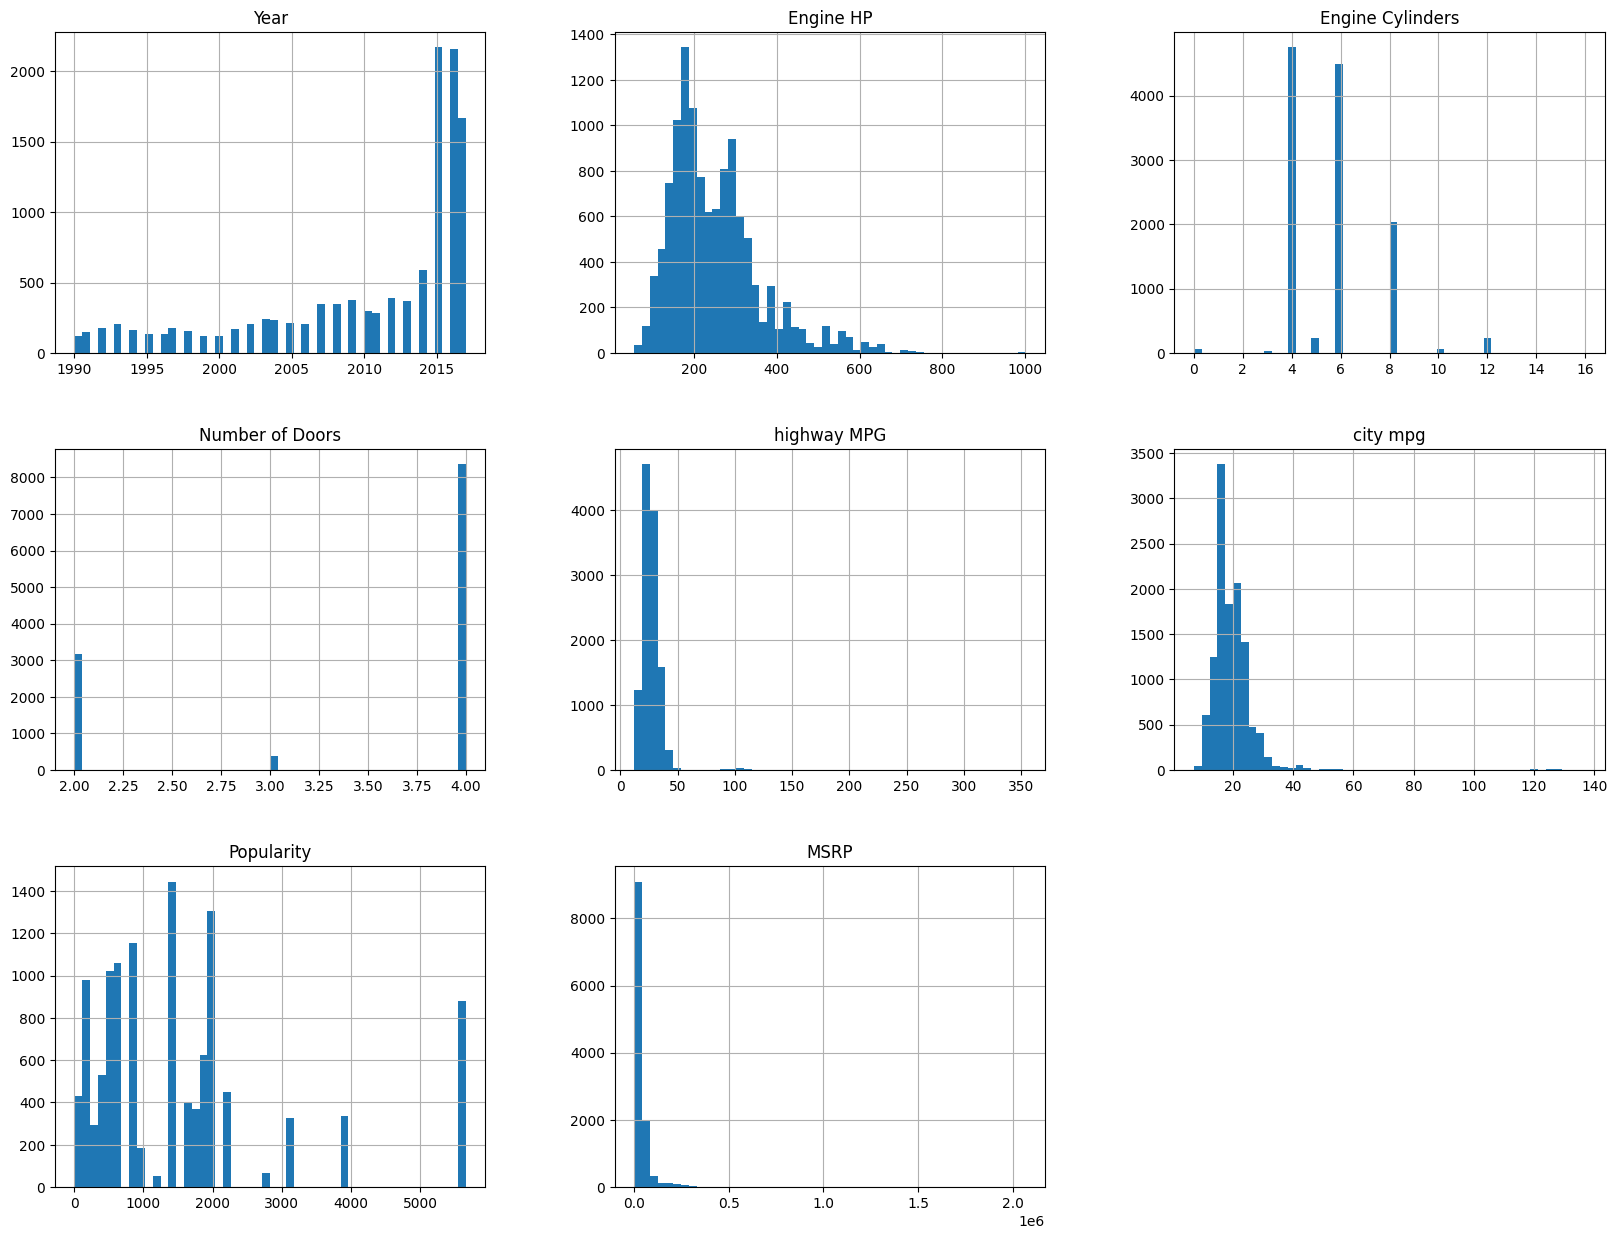

In [50]:
import matplotlib.pyplot as plt

car_df.hist(bins=50, figsize=(20,15))
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(car_df,test_size=0.2,random_state=42)
print(f"Train size: {len(train_set)}")
print(f"Test size: {len(test_set)}")

Train size: 9531
Test size: 2383


In [52]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9531 entries, 3181 to 7270
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9531 non-null   object 
 1   Model              9531 non-null   object 
 2   Year               9531 non-null   int64  
 3   Engine Fuel Type   9528 non-null   object 
 4   Engine HP          9481 non-null   float64
 5   Engine Cylinders   9510 non-null   float64
 6   Transmission Type  9531 non-null   object 
 7   Driven_Wheels      9531 non-null   object 
 8   Number of Doors    9525 non-null   float64
 9   Market Category    6536 non-null   object 
 10  Vehicle Size       9531 non-null   object 
 11  Vehicle Style      9531 non-null   object 
 12  highway MPG        9531 non-null   int64  
 13  city mpg           9531 non-null   int64  
 14  Popularity         9531 non-null   int64  
 15  MSRP               9531 non-null   int64  
dtypes: float64(3), int64(5), o

In [53]:
train_set.describe()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,9531.000000,9481.000000,9510.000000,9525.000000,9531.000000,9531.000000,9531.000000,9.531000e+03
mean,2010.414332,249.144605,5.623659,3.442625,26.635715,19.692372,1558.511174,4.080480e+04
std,7.543583,109.371607,1.780111,0.878239,8.747221,8.494193,1444.749854,6.261255e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,8.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.105750e+04
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999000e+04
75%,2016.000000,302.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.244250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [54]:
print(train_set["Make"].value_counts().head(10))
print(train_set["Transmission Type"].value_counts())

Make
Chevrolet     899
Ford          705
Volkswagen    662
Toyota        589
Dodge         506
Nissan        432
GMC           394
Honda         353
Mazda         337
Cadillac      322
Name: count, dtype: int64
Transmission Type
AUTOMATIC           6619
MANUAL              2344
AUTOMATED_MANUAL     504
DIRECT_DRIVE          48
UNKNOWN               16
Name: count, dtype: int64


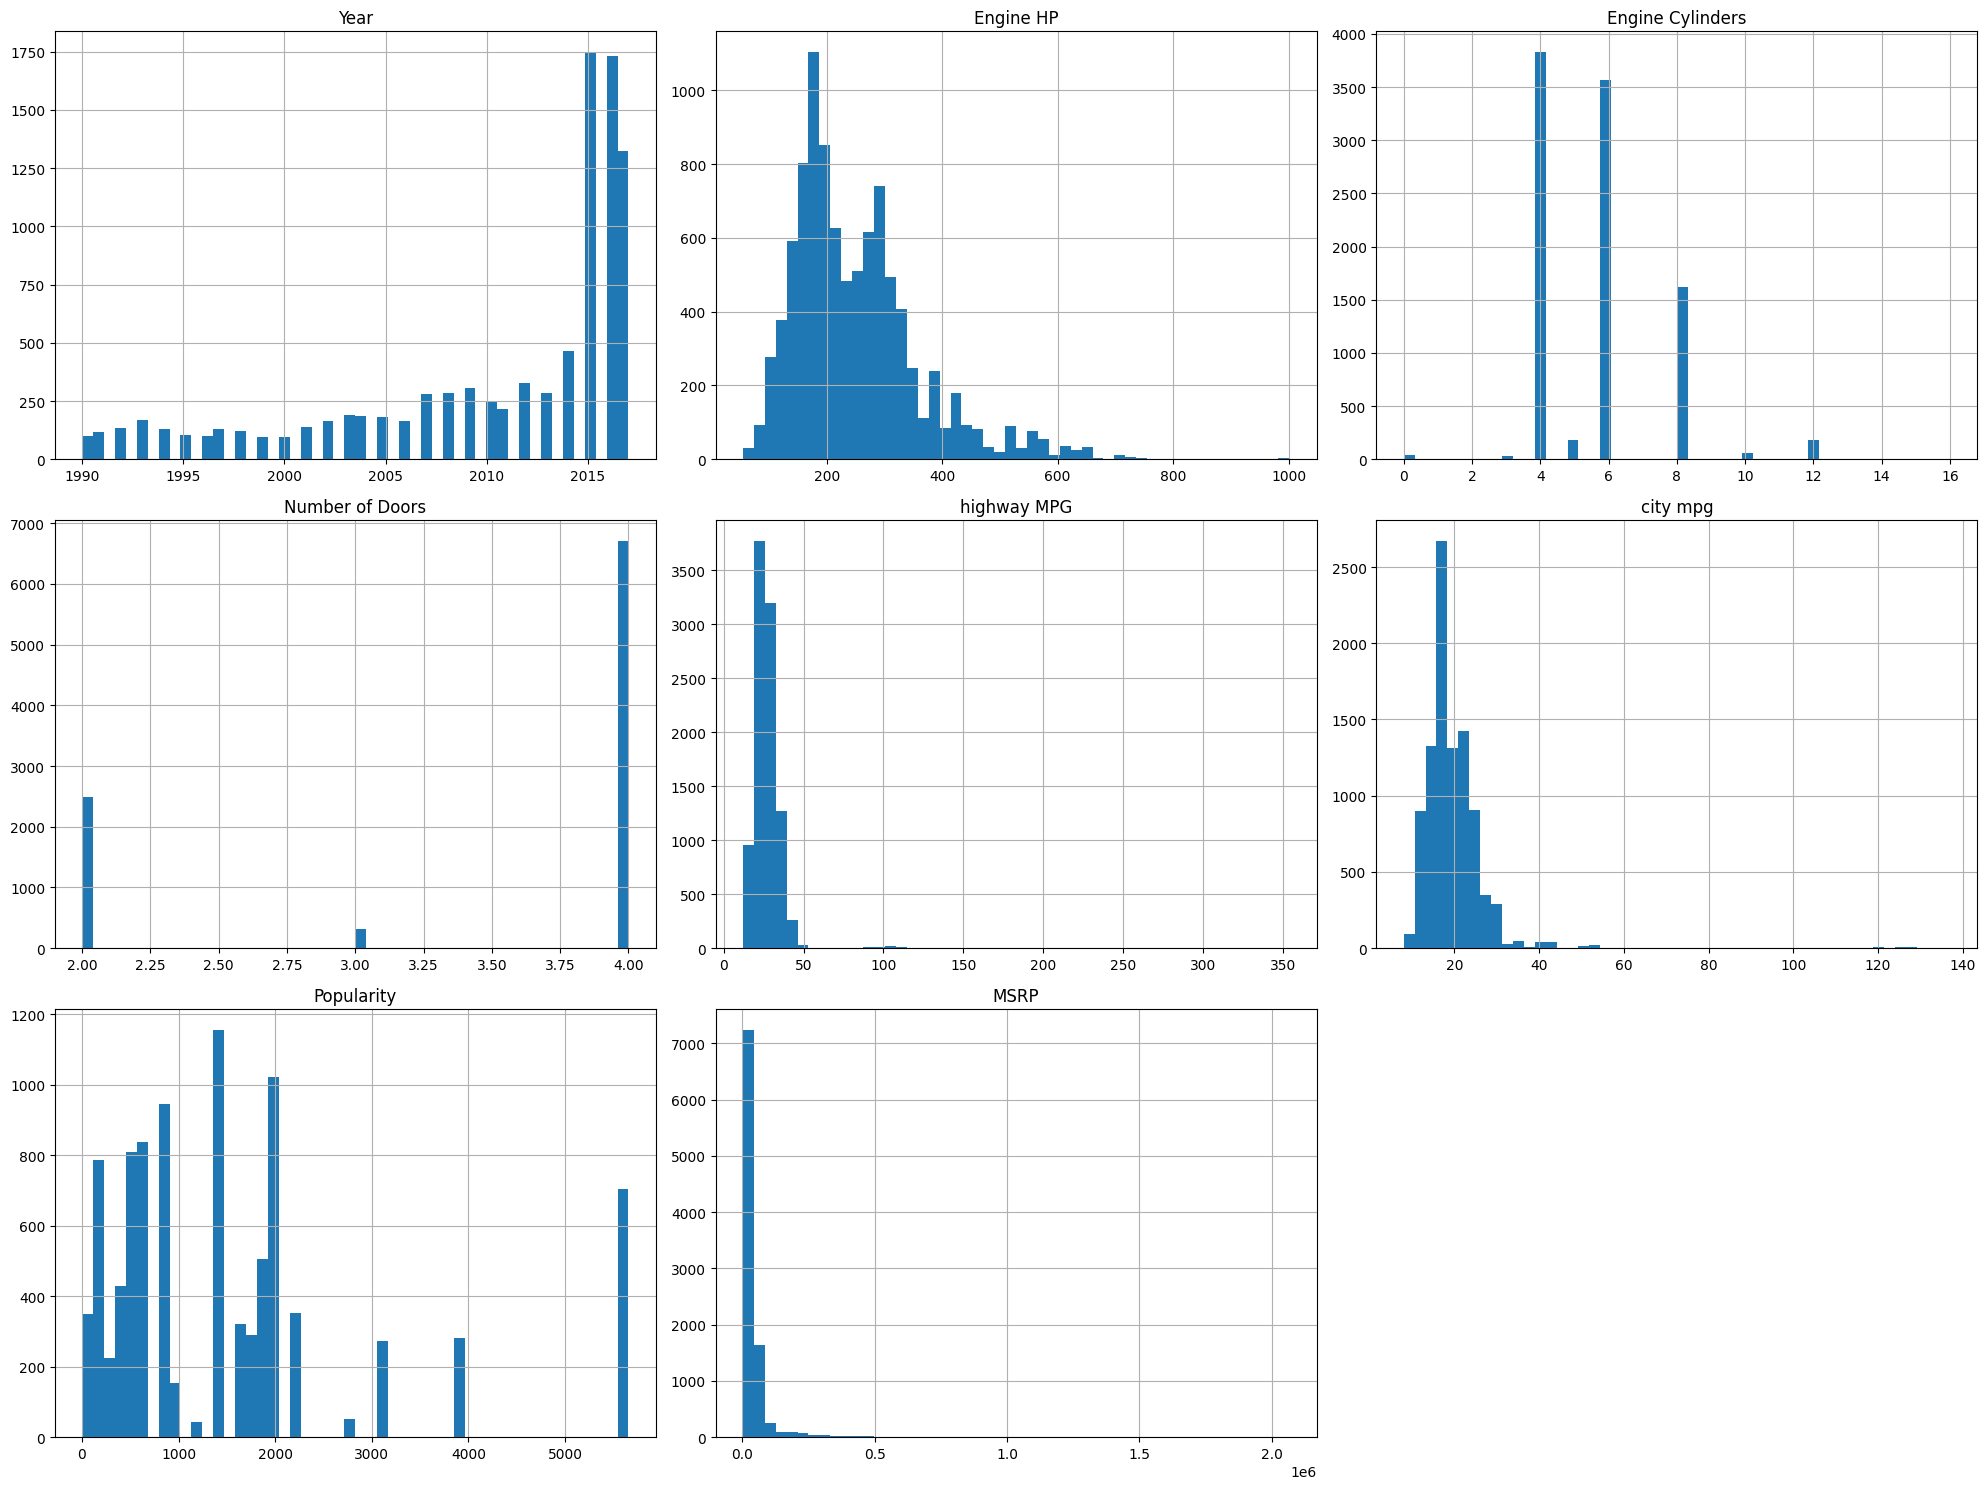

In [55]:
import matplotlib.pyplot as plt

train_set.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()


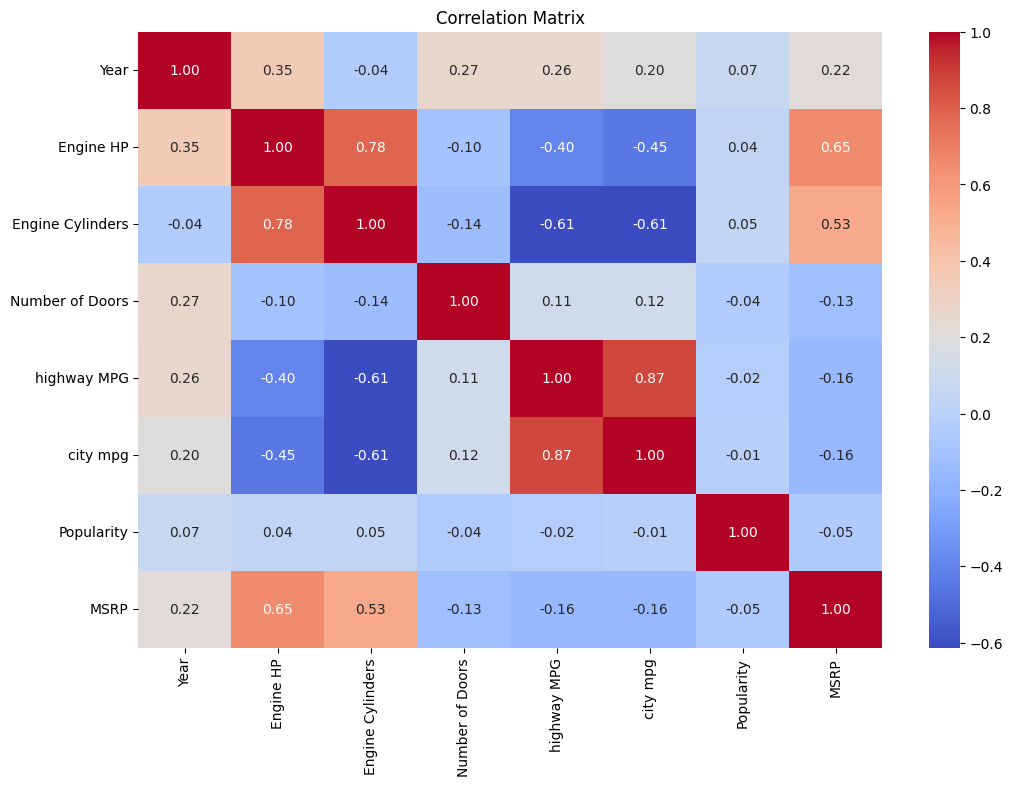

In [56]:
import seaborn as sns
corr_matrix = train_set.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [57]:

data = train_set.copy()

data["power_per_cylinder"] = data["Engine HP"] / data["Engine Cylinders"]
data["mpg_ratio"] = data["highway MPG"] / data["city mpg"]

new_corr = data.corr(numeric_only=True)["MSRP"].sort_values(ascending=False)
print(new_corr)


MSRP                  1.000000
Engine HP             0.648786
Engine Cylinders      0.528001
power_per_cylinder    0.345596
Year                  0.218544
mpg_ratio             0.202484
Popularity           -0.048784
Number of Doors      -0.127168
highway MPG          -0.158832
city mpg             -0.163725
Name: MSRP, dtype: float64


In [58]:
data["Make"].value_counts().shape[0]


48

In [59]:
car_df = car_df.dropna(subset=["Engine HP", "Engine Cylinders", "Number of Doors"])
car = car_df.copy()
car["power_per_cylinder"] = car["Engine HP"] / car["Engine Cylinders"]
car["mpg_ratio"] = car["highway MPG"] / car["city mpg"]

X = car[["Make", "Engine HP", "Engine Cylinders", "power_per_cylinder", "Year",
         "mpg_ratio", "Popularity", "Number of Doors", "highway MPG", "city mpg"]]
y = car["MSRP"]


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
numerical_features = ["Engine HP", "Engine Cylinders", "power_per_cylinder", "Year",
                      "mpg_ratio", "Popularity", "Number of Doors", "highway MPG", "city mpg"]
categorical_features = ["Make"]

In [62]:
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

full_pipeline_with_model = make_pipeline(preprocessor, LinearRegression())

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [65]:
numeric_X = X.select_dtypes(include=[np.number])
print(np.isinf(numeric_X).sum())

print(numeric_X.isna().sum())

X.replace([np.inf, -np.inf], np.nan, inplace=True)

X.dropna(inplace=True)
y = y.loc[X.index]

Engine HP              0
Engine Cylinders       0
power_per_cylinder    13
Year                   0
mpg_ratio              0
Popularity             0
Number of Doors        0
highway MPG            0
city mpg               0
dtype: int64
Engine HP             0
Engine Cylinders      0
power_per_cylinder    0
Year                  0
mpg_ratio             0
Popularity            0
Number of Doors       0
highway MPG           0
city mpg              0
dtype: int64


/tmp/ipython-input-65-3015628278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-65-3015628278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

full_pipeline_with_model.fit(X_train, y_train)

y_pred = full_pipeline_with_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 19625.659220388883


In [67]:
num_attribs = ["Engine HP", "Engine Cylinders", "power_per_cylinder", "Year",
               "mpg_ratio", "Popularity", "Number of Doors", "highway MPG", "city mpg"]
cat_attribs = ["Make"]

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])


In [68]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
full_pipeline_with_forest = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", forest_reg)
])

full_pipeline_with_forest.fit(X_train, y_train)
y_pred_forest = full_pipeline_with_forest.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)

print("Random Forest RMSE:", rmse_forest)


Random Forest RMSE: 14778.029175646368


In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    full_pipeline_with_forest, X_train, y_train,
    scoring="neg_mean_squared_error", cv=5
)

rmse_scores = np.sqrt(-scores)
print("Cross-Validated RMSE scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

Cross-Validated RMSE scores: [35194.32928976  8180.81597775 11385.06812793 30610.16946567
 44876.53913116]
Mean: 26049.38439845706
Standard deviation: 14094.115381328005


In [70]:
!pip install xgboost

In [71]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_pipeline = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", xgb_reg)
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 13352.109646044702


In [72]:
from sklearn.model_selection import cross_val_score

scores_xgb = cross_val_score(
    xgb_pipeline, X_train, y_train,
    scoring="neg_root_mean_squared_error", cv=5
)
rmse_scores_xgb = -scores_xgb

print("XGBoost Cross-Validated RMSE scores:", rmse_scores_xgb)
print("Mean:", rmse_scores_xgb.mean())
print("Standard deviation:", rmse_scores_xgb.std())


XGBoost Cross-Validated RMSE scores: [33626.6171875  10580.29101562 10024.60644531 34468.859375
 50263.609375  ]
Mean: 27792.7966796875
Standard deviation: 15462.985697835053


In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distribs = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5)
}


In [74]:
xgb_reg = XGBRegressor(random_state=42)

from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline([
    ("preprocessing", full_pipeline),
    ("model", xgb_reg)
])


In [75]:
rnd_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions={
        "model__" + k: v for k, v in param_distribs.items()
    },
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=2
)

rnd_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=13, model__n_estimators=121, model__subsample=0.7993292420985183; total time=   1.3s
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=13, model__n_estimators=121, model__subsample=0.7993292420985183; total time=   0.9s
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=13, model__n_estimators=121, model__subsample=0.7993292420985183; total time=   9.4s
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=13, model__n_estimators=121, model__subsample=0.7993292420985183; total time=   9.7s
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=13, model__n_estimators=121, model__subsample=0.7993292420985183; total time=   0.8s
[CV] END model__learning_rate=0.05680559213273095, model__max_depth=5, model__n_estimators=264, model__subsample=0.5290418060840998; total time=   0.3s
[CV] END model__learni

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Engine '
                                                                                'HP',
                                                                                'Engine '
                                                                                'Cylinders',
                                                                                'power_per_cylinder',
                                                                                'Year',
                                                                                'mpg_ratio',
                                                                                'Popularity',
                                                                                'Number '
                                                                                'of '
                                                                                'Doors',
                                                                                'highway '
                                                                                'MPG',
                                                                                'city '
                                                                                'mpg']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Make'])])),
                                             ('m...
                                        'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abaa11e6050>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abaa11e6a50>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7abaa11cfe90>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [76]:
print("Best Parameters:", rnd_search.best_params_)
print("Best Score (Neg RMSE):", rnd_search.best_score_)

final_model = rnd_search.best_estimator_
y_pred = final_model.predict(X_test)

from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
print("Final RMSE on Test Set:", final_rmse)


Best Parameters: {'model__learning_rate': np.float64(0.07370173320348283), 'model__max_depth': 14, 'model__n_estimators': 70, 'model__subsample': np.float64(0.8087407548138583)}
Best Score (Neg RMSE): -25893.0873046875
Final RMSE on Test Set: 13728.14160766125


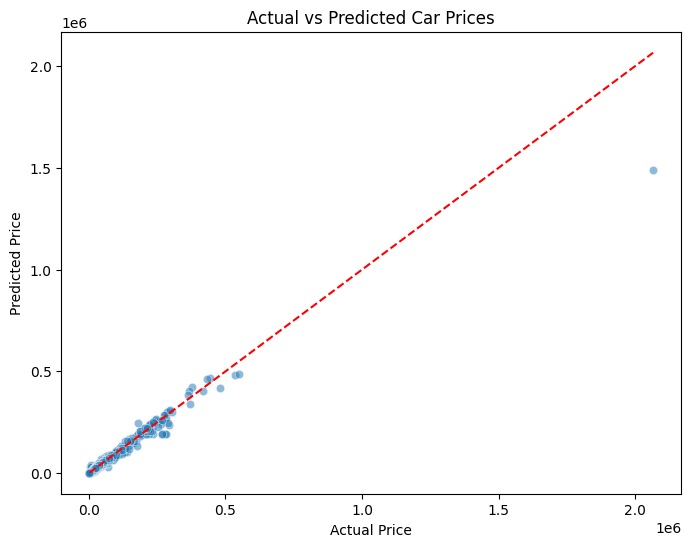

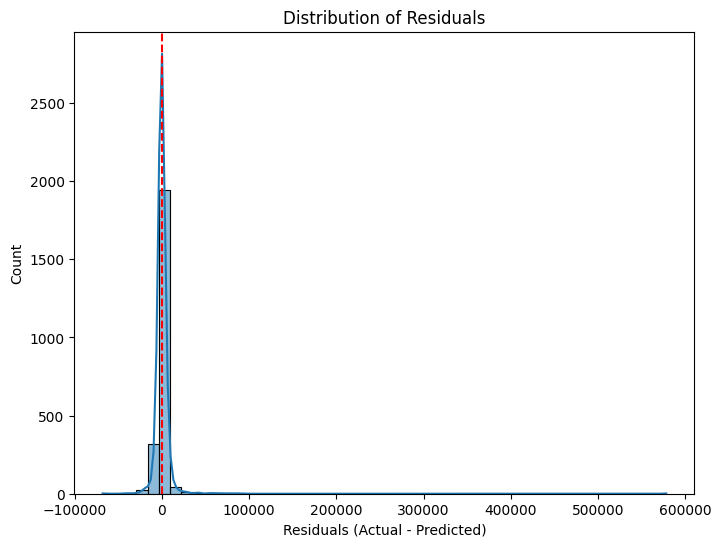

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

final_model = rnd_search.best_estimator_
y_pred = final_model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Distribution of Residuals")
plt.axvline(0, color='r', linestyle='--')
plt.show()


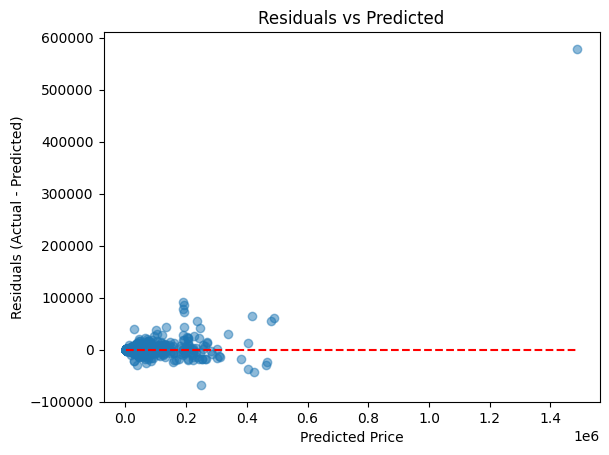

In [78]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()


In [79]:
import joblib

joblib.dump(rnd_search.best_estimator_, "car_price_predictor.pkl")


['car_price_predictor.pkl']